In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('hotels_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,07/07/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,07/07/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,01/07/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,08/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,03/09/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017


In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
df = df[df['adr']<1000]

In [223]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/04/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2015' in DD/MM/YYYY format. Provide format or specif

# Univariate 

In [80]:
def plot_countplot(df,col,xlabel,ylabel,title,order=None,hue=None):
    if hue:
        props = df.groupby(col)['canceled'].value_counts(normalize=True).mul(100).reset_index(name='prop')
        g = sns.barplot(data=props,y='prop',x=col,order=order,hue=hue)
    else:
        props = df[col].value_counts(normalize=True).mul(100).reset_index(name='prop')
        g = sns.barplot(data=props,y='prop',x='index',order=order,hue=hue)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if hue==None:
        g.bar_label(g.containers[0], fmt='%.2f')

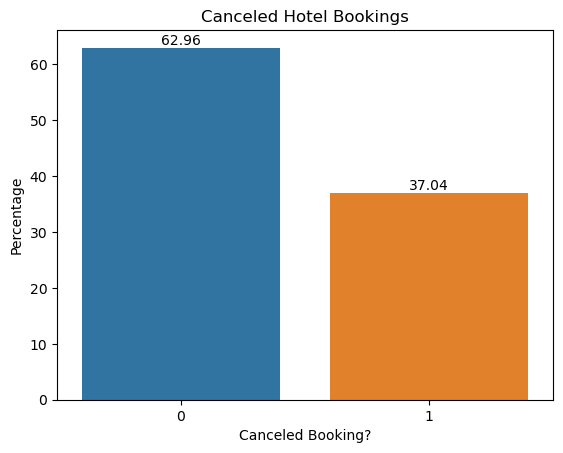

In [28]:
xlabel = "Canceled Booking?"
ylabel = 'Percentage'
title  = "Canceled Hotel Bookings"
plot_countplot(df,'is_canceled',xlabel,ylabel,title)

37% of the bookings in the dataset were canceled.

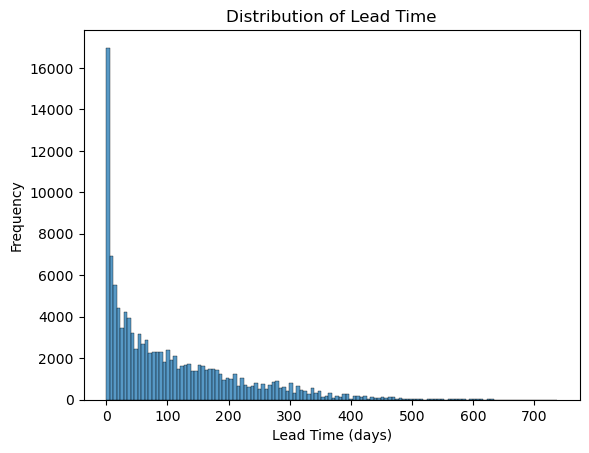

In [30]:
g = sns.histplot(data=df,x='lead_time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time');

Lead times are highly concentrated between 0 days - 20 days. We can also see lead days that are more than 700 days!

Lets plot the distribution again but limit it to 100 days.

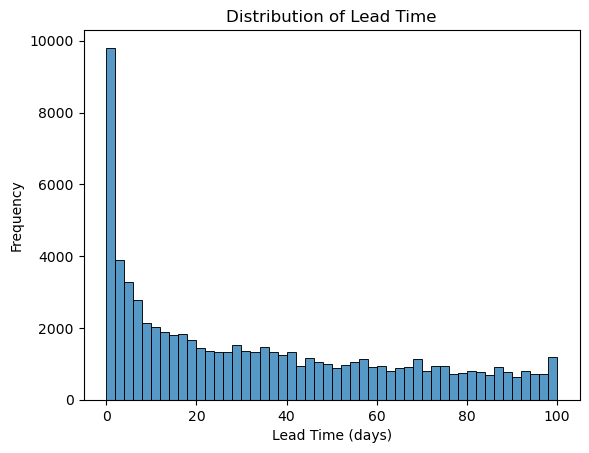

In [31]:
selec = df[df['lead_time']<=100]
bins=np.arange(0,101,2)
sns.histplot(data=selec,x='lead_time',bins=bins)
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time');

There are alot of bookings that have a lead time of 0-2days. 

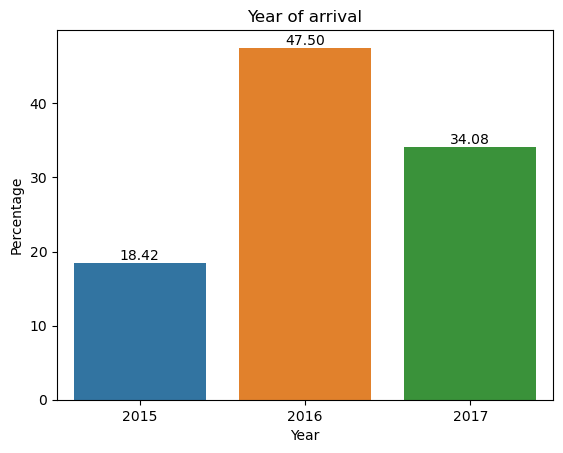

In [32]:
xlabel = "Year"
ylabel = 'Percentage'
title  = "Year of arrival"
plot_countplot(df,'arrival_date_year',xlabel,ylabel,title)

47% of the clients would arrive in the year 2016, 34% in the year 2017 and 18% in the year 2015. There is an increase of bookings from 2015 to 2016 and a decrease from 2016 to 2017 because the dataset only has bookings that would arrive from 1st of July of 2015 and the 31st of August 2017. 

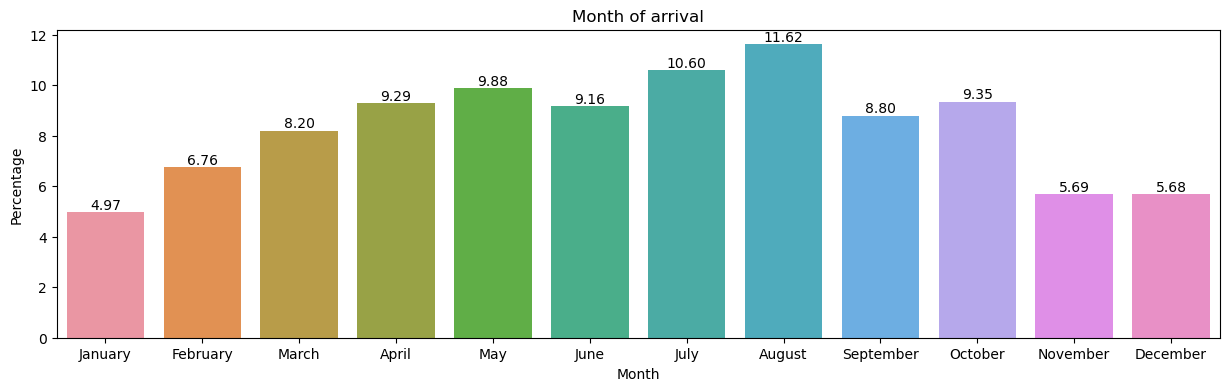

In [33]:
xlabel = "Month"
ylabel = 'Percentage'
title  = "Month of arrival"
order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.subplots(figsize=(15,4))
plot_countplot(df,'arrival_date_month',xlabel,ylabel,title,order)

22% of the customer were expected to arrive in July and August. November, December and January had the fewest bookings for those months. Maybe because the dataset covers fromt the time period 1st July 2015 to 31st August 2017, meaning there are fewer datapoints for the beginning of the year and end of the year.  Lets look at the year 2016 since it's the only year with bookings from 1st Jan to 31st December.

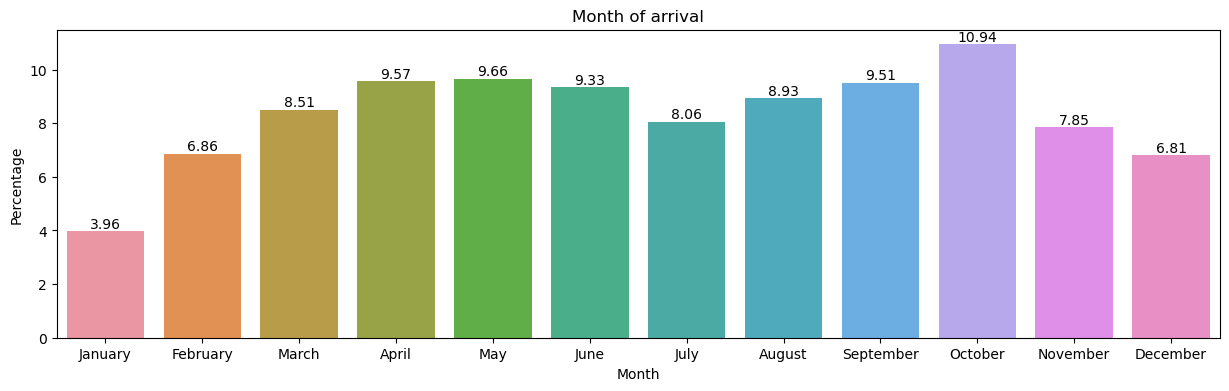

In [34]:
plt.subplots(figsize=(15,4))
plot_countplot(df[df['arrival_date_year']==2016],'arrival_date_month',xlabel,ylabel,title,order)

Aha, the story now changes with bookings for the year 2016. January had the fewest number of bookings and it peaked around October. March to June had a consistent percentage of 9% with a drop in the month of July.

Text(0.5, 1.0, 'Week Number of arrival')

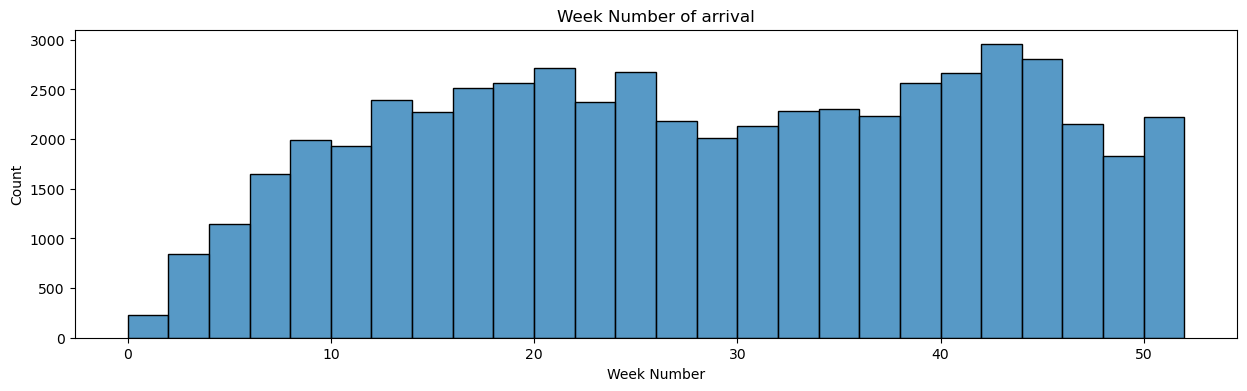

In [35]:
xlabel = "Week Number"
ylabel = 'Count'
title  = "Week Number of arrival"
plt.subplots(figsize=(15,4))
# plot_countplot(df,'arrival_date_week_number',xlabel,ylabel,title)
bins = np.arange(0,54,2)
sns.histplot(data=df[df['arrival_date_year']==2016],x='arrival_date_week_number',bins=bins)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

There were fewer bookings in the first 6 weeks of the year 2016.

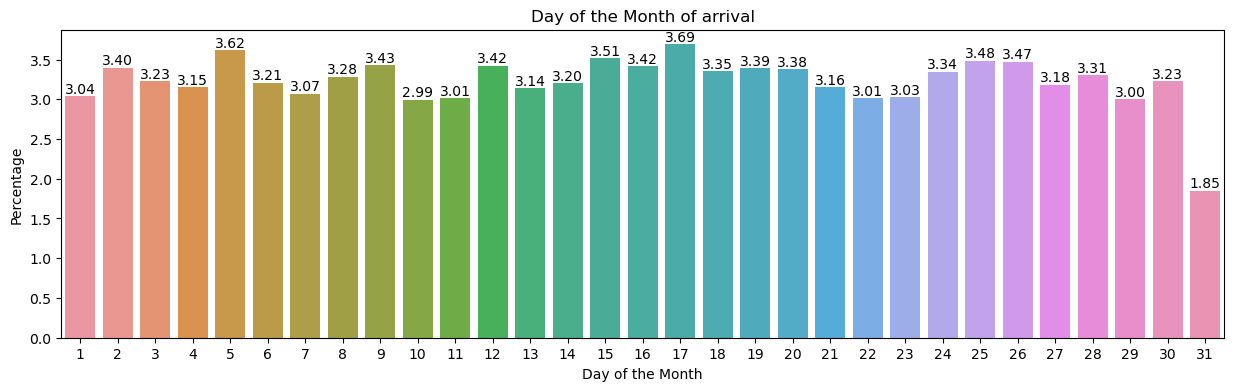

In [36]:
xlabel = "Day of the Month"
ylabel = 'Percentage'
title  = "Day of the Month of arrival"
plt.subplots(figsize=(15,4))
plot_countplot(df,'arrival_date_day_of_month',xlabel,ylabel,title)

Bookings were spread out through out the month but 31st day of the month had the fewest bookings. Maybe this is because are fewer months with 31 days

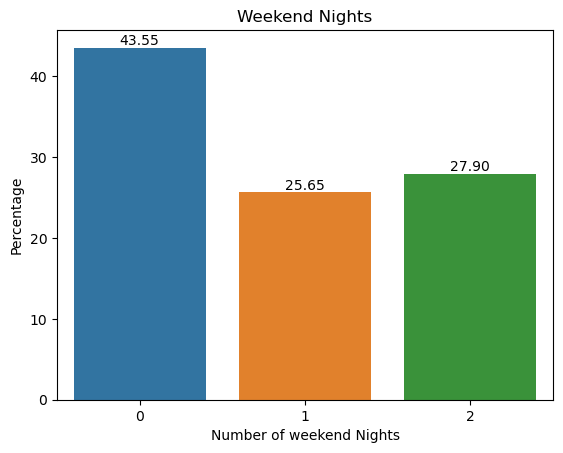

In [37]:
xlabel = "Number of weekend Nights"
ylabel = 'Percentage'
title  = "Weekend Nights"
order = [0,1,2]
# plt.subplots(figsize=(15,4))
plot_countplot(df,'stays_in_weekend_nights',xlabel,ylabel,title,order)

43% of the bookings had 0 number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

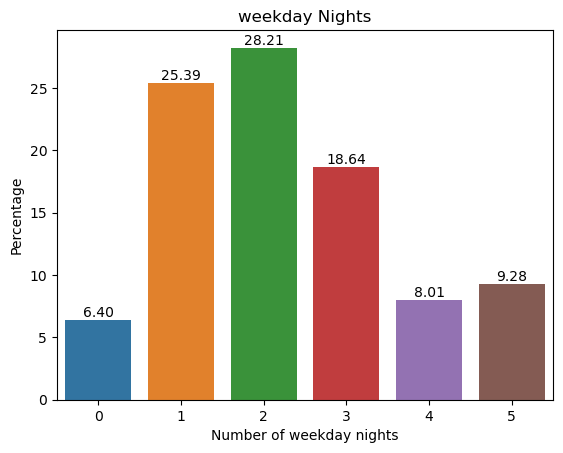

In [38]:
xlabel = "Number of weekday nights"
ylabel = 'Percentage'
title  = "weekday Nights"
order = [0,1,2,3,4,5]
# plt.subplots(figsize=(15,4))
plot_countplot(df,'stays_in_week_nights',xlabel,ylabel,title,order)

Only 6% of guests did not book to stay in the hotel on weekday night. 53% of the guests booked 1-2 weekday nights.

In [39]:
df['adults'].value_counts(normalize=True).mul(100)

2     75.114960
1     19.287372
3      5.194783
0      0.337552
4      0.051931
26     0.004188
27     0.001675
20     0.001675
5      0.001675
40     0.000838
50     0.000838
55     0.000838
6      0.000838
10     0.000838
Name: adults, dtype: float64

75% of the guest are couples. There are bookings with groups of upto 55 adults!

In [40]:
df['children'].value_counts(normalize=True).mul(100)

0.0     92.804791
1.0      4.071701
2.0      3.059011
3.0      0.063660
10.0     0.000838
Name: children, dtype: float64

In [41]:
df['babies'].value_counts(normalize=True).mul(100)

0     99.231923
1      0.753838
2      0.012564
10     0.000838
9      0.000838
Name: babies, dtype: float64

Majority of the bookings do not have children or baby guests.

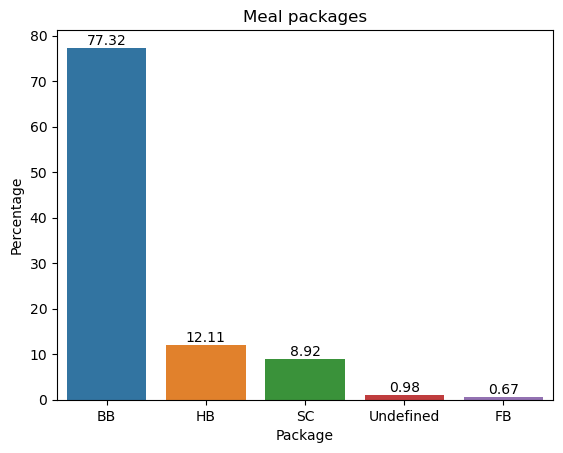

In [42]:
xlabel = "Package"
ylabel = 'Percentage'
title  = "Meal packages"
plot_countplot(df,'meal',xlabel,ylabel,title)

77% of the bookings had a break and bed meal packages while 10% of the bookings had no meal packages

In [43]:
df['country'].value_counts().iloc[:10]

PRT    48589
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

40% of bookings were made in Portugal and looking at the top 10 countries, most of the guests are European.

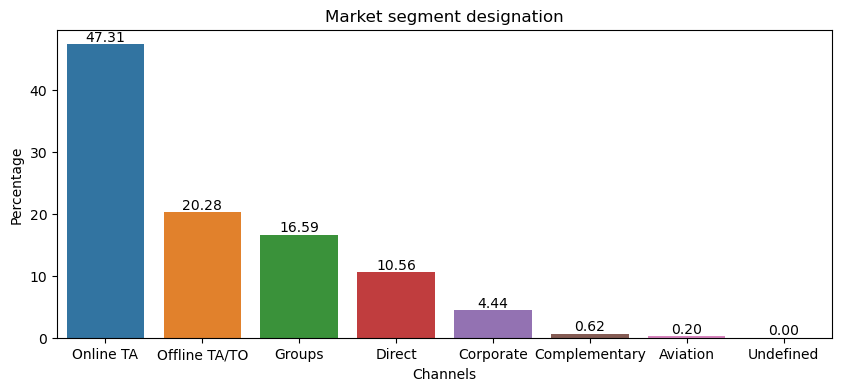

In [44]:
xlabel = "Channels"
ylabel = 'Percentage'
title  = "Market segment designation"
plt.subplots(figsize=(10,4))
plot_countplot(df,'market_segment',xlabel,ylabel,title);

47% of the bookings were made through Online Travel Agents. 

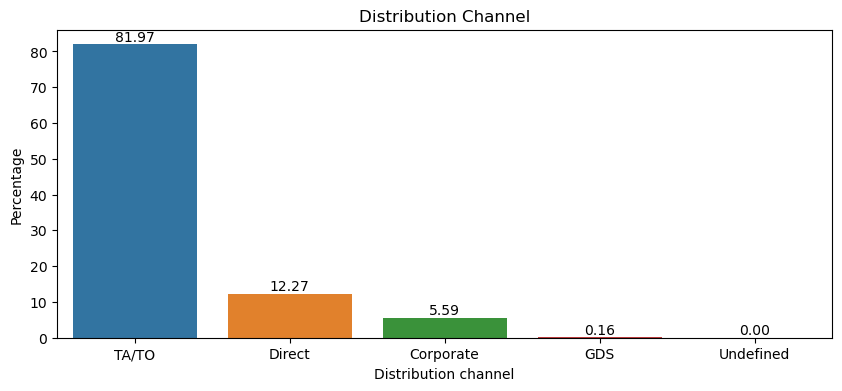

In [45]:
xlabel = "Distribution channel"
ylabel = 'Percentage'
title  = "Distribution Channel"
plt.subplots(figsize=(10,4))
plot_countplot(df,'distribution_channel',xlabel,ylabel,title);

Majority of the reservations/bookings were made through Travel Agents/Operators, with 12% of the bookings being direct and 5% of the bookings are made by corporates.

In [46]:
df['is_repeated_guest'].value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

For majority of the guests its their first time in that hotel

In [47]:
df['previous_cancellations'].value_counts()

0     112905
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

We can see majority of the guests have never canceled a previous booking before. There are guests who have canceled more than 20 times previously. 

In [48]:
df['previous_bookings_not_canceled'].value_counts()

0     115769
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

For majority of the customers this is their first time booking in this hotel. 

In [49]:
df['reserved_room_type'].value_counts(normalize=True)

A    0.720276
D    0.160827
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

72% of guests reserved for room type A and 16% reserved for room type D.

In [50]:
df['assigned_room_type'].value_counts(normalize=True)

A    0.620258
D    0.212097
E    0.065383
F    0.031418
G    0.021384
C    0.019893
B    0.018117
H    0.005964
I    0.003040
K    0.002337
P    0.000101
L    0.000008
Name: assigned_room_type, dtype: float64

62% of guests were assigned room type A and 21% were assigned room type D. it'll be interesting to see the relationship between guests who were assigned different rooms and if they canceled their booking.

In [51]:
df['is_assigned'] = df['assigned_room_type'] == df['reserved_room_type']
df['is_assigned'].value_counts(normalize=True)

True     0.875055
False    0.124945
Name: is_assigned, dtype: float64

12% of guests got a different room than they reserved for.

In [52]:
df['booking_changes'].value_counts()

0     101314
1      12700
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

There are bookings that had more than 10 ammendents or changes.

In [53]:
df['deposit_type'].value_counts(normalize=True)

No Deposit    0.876471
Non Refund    0.122172
Refundable    0.001357
Name: deposit_type, dtype: float64

88% of the bookings had no deposits to it, 12% of the bookings had a deposit made in the value of the total stay cost.

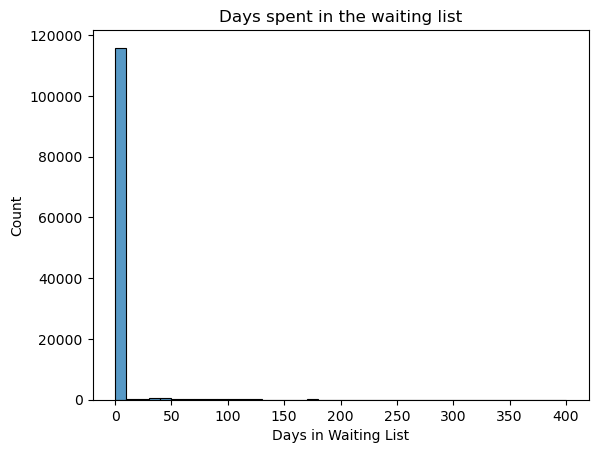

In [54]:
bins = np.arange(0,df['days_in_waiting_list'].max()+10,10)
sns.histplot(data=df,x='days_in_waiting_list',bins=bins)
plt.xlabel('Days in Waiting List')
plt.ylabel("Count")
plt.title('Days spent in the waiting list');

Majority of the guests spent around 0 days waiting for a confirmation; meaning they received a confirmation on the same day the booking was made. THere are guests who waited more than 100 days for a confirmation.

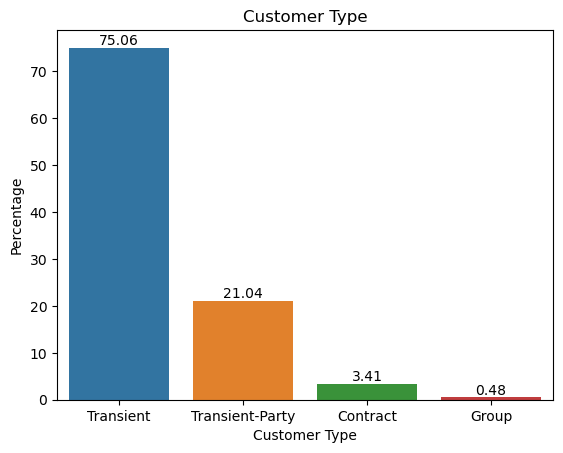

In [55]:
xlabel = "Customer Type"
ylabel = 'Percentage'
title  = "Customer Type"
# plt.subplots(figsize=(10,4))
plot_countplot(df,'customer_type',xlabel,ylabel,title);

96% of the customers are transient meaning they are Guests with a last-minute booking 

<AxesSubplot:xlabel='adr', ylabel='Count'>

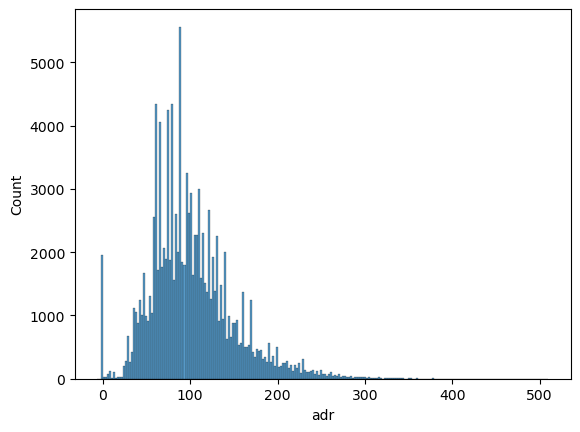

In [56]:
sns.histplot(data=df,x='adr')

<AxesSubplot:ylabel='adr'>

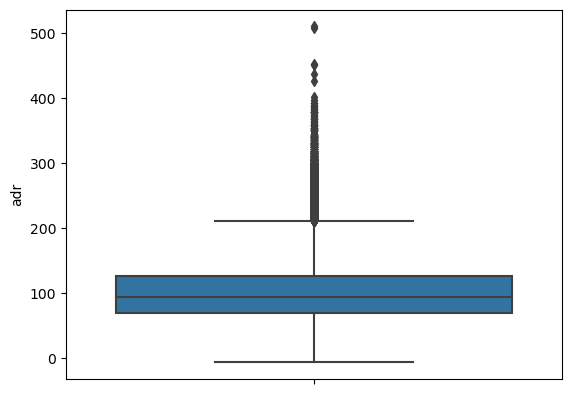

In [57]:
sns.boxplot(data=df,y='adr')

On Average, the APR is 100. but there are bookings with an APR of 0

In [58]:
df['required_car_parking_spaces'].value_counts(normalize=True)

0    0.937884
1    0.061840
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

Majority of the guests didn't require a parking space.

In [59]:
df['total_of_special_requests'].value_counts(normalize=True)

0    0.588974
1    0.278300
2    0.108628
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

58% of guests didn't make any special requests while 42% of the guests made 1 or more special requests.

In [60]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629589
Canceled     0.360301
No-Show      0.010110
Name: reservation_status, dtype: float64

Even though they are a tiny number, 1% of guests didn't show up and did inform the hotel on the reason why. 

In [61]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

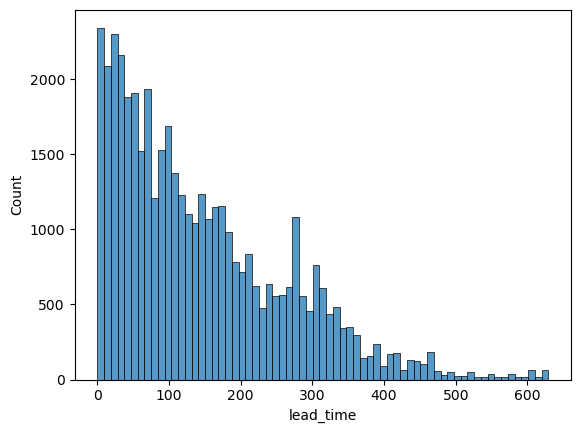

In [62]:
canceled_df = df[df['is_canceled']==1]
notcanceled_df = df[df['is_canceled']==0]
sns.histplot(canceled_df['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

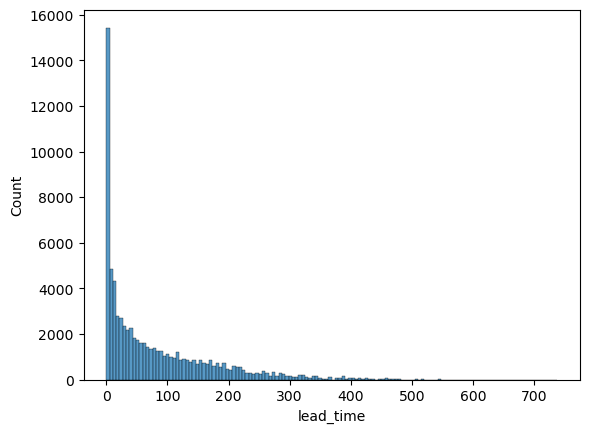

In [63]:
sns.histplot(notcanceled_df['lead_time'])

In [64]:
df['is_canceled'].value_counts() / df.shape[0]

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

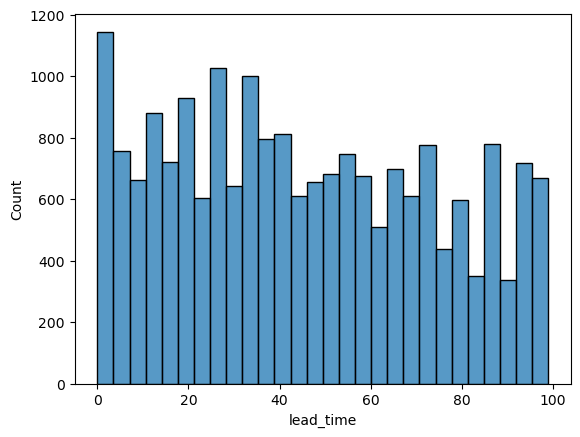

In [65]:
sns.histplot(canceled_df[canceled_df['lead_time']<100]['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

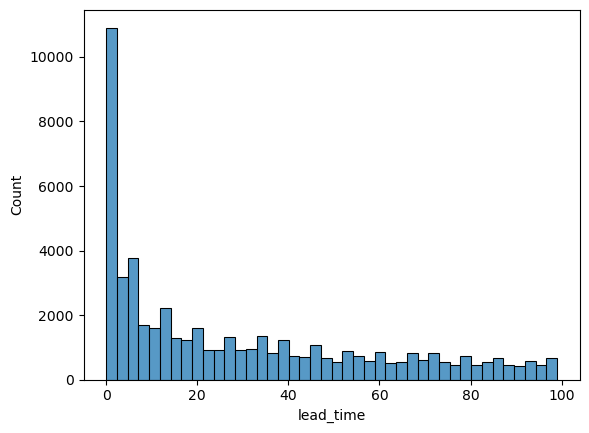

In [66]:
sns.histplot(notcanceled_df[notcanceled_df['lead_time']<100]['lead_time'])

## Bivariate

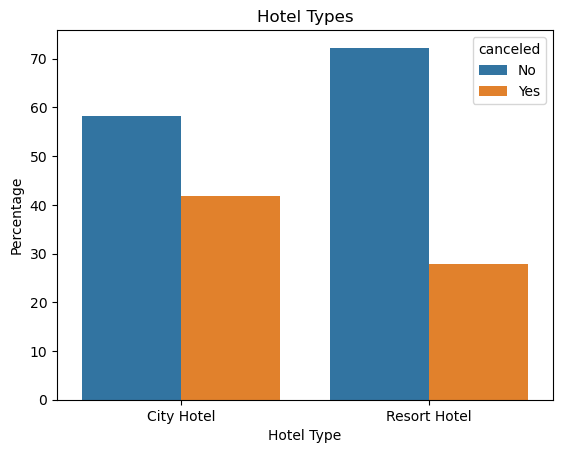

In [81]:
df['canceled'] = df['is_canceled'].apply(lambda x: 'Yes' if x else 'No')
xlabel = "Hotel Type"
ylabel = 'Percentage'
title  = "Hotel Types"
plot_countplot(df,'hotel',xlabel,ylabel,title,hue='canceled')

City hotel had more canceled bookings than bookings were the customer showed up.

Text(0.5, 0, 'Lead Time')

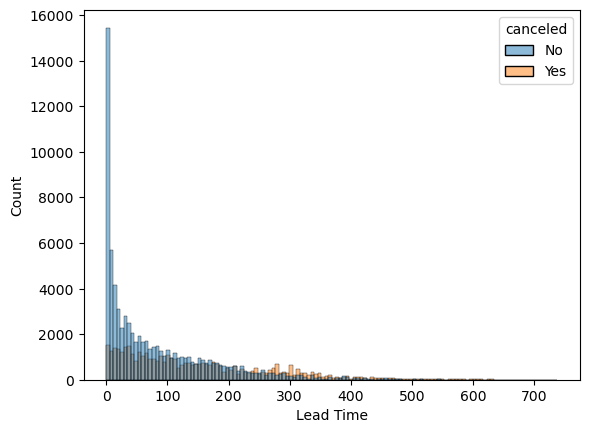

In [73]:
sns.histplot(data=df,x='lead_time',hue='canceled')
plt.xlabel('Lead Time')

We can see there are more canceled bookings compared to bookings were guests showed up when the lead time is more than 200.

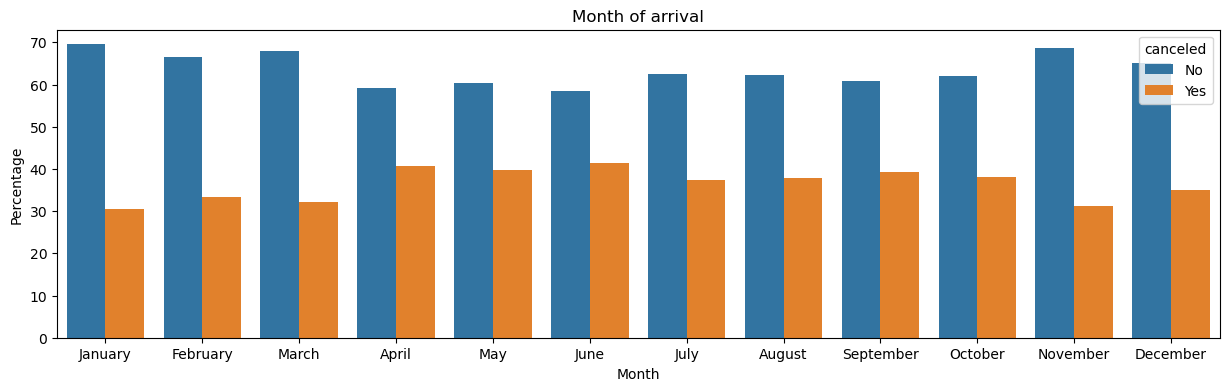

In [82]:
xlabel = "Month"
ylabel = 'Percentage'
title  = "Month of arrival"
order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.subplots(figsize=(15,4))
plot_countplot(df,'arrival_date_month',xlabel,ylabel,title,order,hue='canceled')

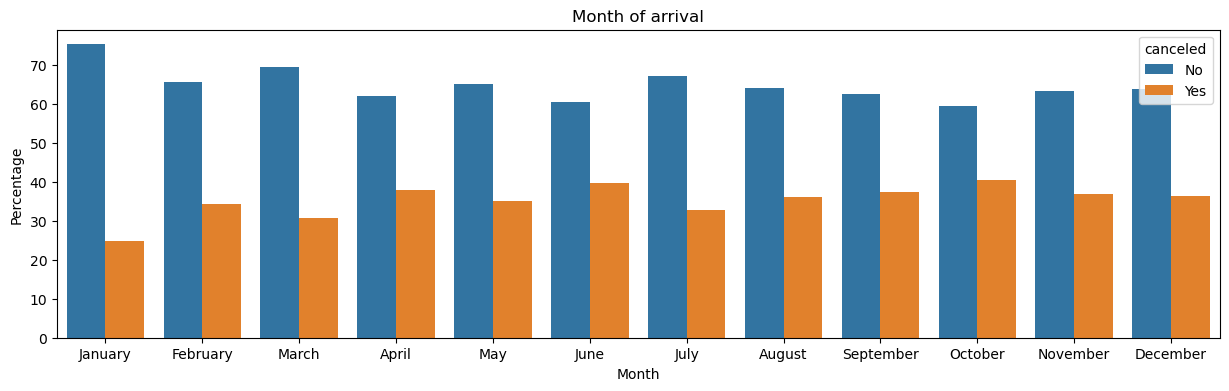

In [83]:
plt.subplots(figsize=(15,4))
plot_countplot(df[df['arrival_date_year']==2016],'arrival_date_month',xlabel,ylabel,title,order,hue='canceled')

2016 January had the most show ups.

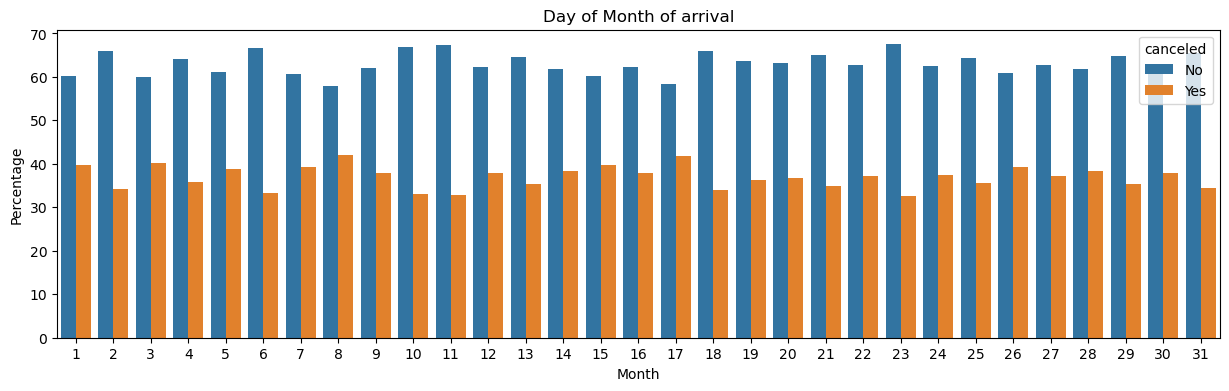

In [87]:
xlabel = "Month"
ylabel = 'Percentage'
title  = "Day of Month of arrival"
plt.subplots(figsize=(15,4))
plot_countplot(df,'arrival_date_day_of_month',xlabel,ylabel,title,hue='canceled')

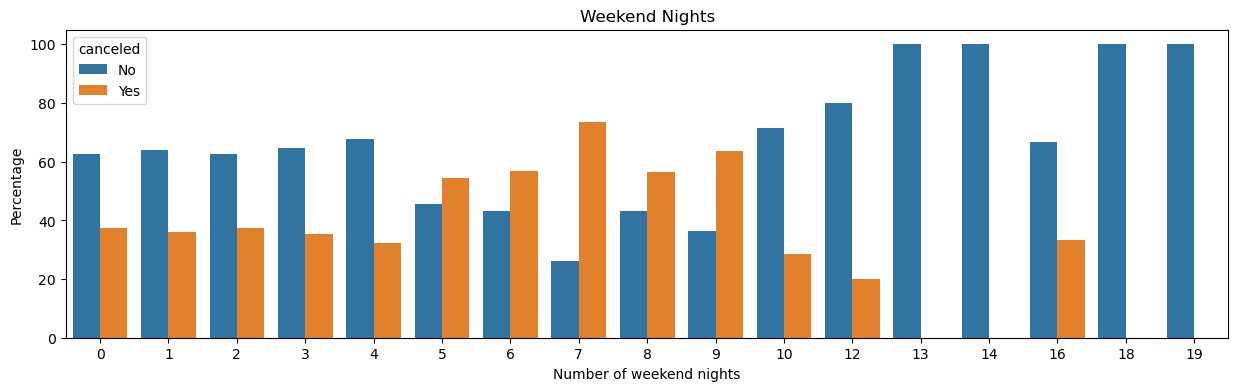

In [90]:
xlabel = "Number of weekend nights"
ylabel = 'Percentage'
title  = "Weekend Nights"
plt.subplots(figsize=(15,4))
plot_countplot(df,'stays_in_weekend_nights',xlabel,ylabel,title,hue='canceled')

Guests who booked for 5-9 weekend nights are more likely to cancel their booking. While guests who booked 13-14 or 18-19 rarely canceled their bookings.

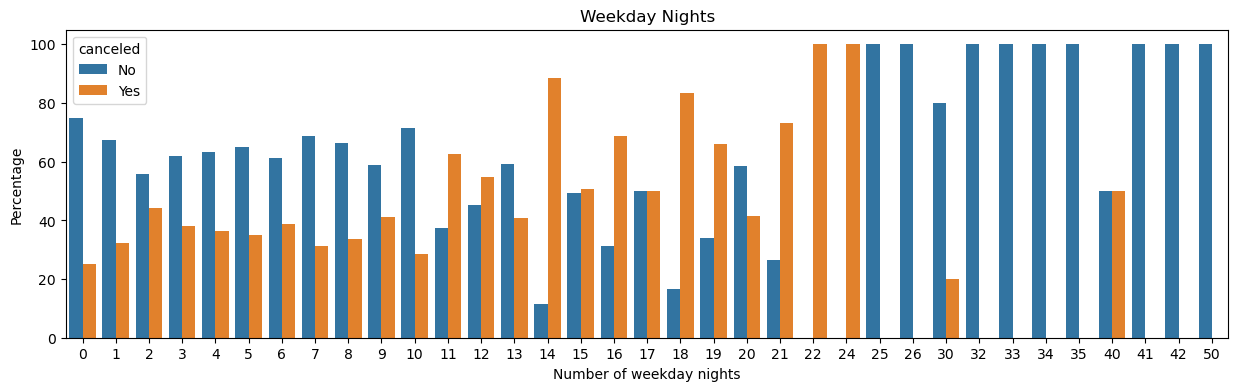

In [91]:
xlabel = "Number of weekday nights"
ylabel = 'Percentage'
title  = "Weekday Nights"
plt.subplots(figsize=(15,4))
plot_countplot(df,'stays_in_week_nights',xlabel,ylabel,title,hue='canceled')

Guests who booked for 12-24 week nights are more likely to cancel their booking. 

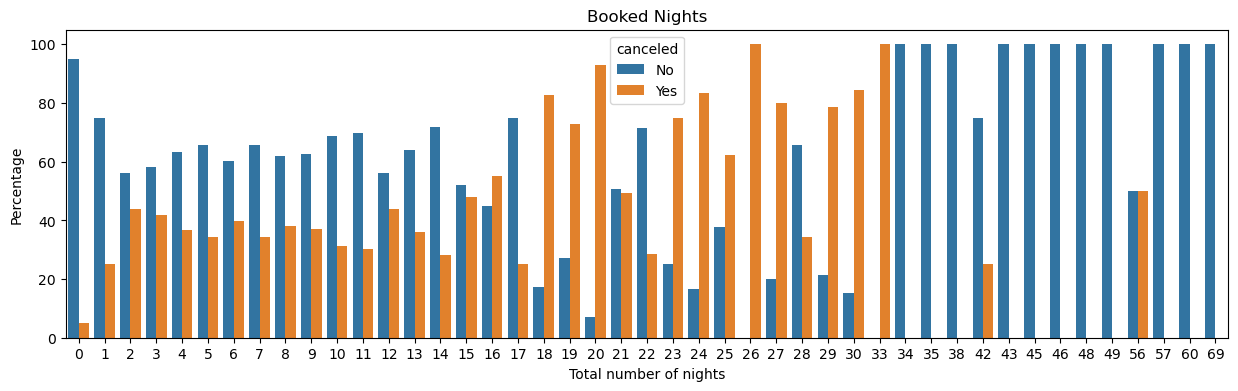

In [93]:
xlabel = "Total number of nights"
ylabel = 'Percentage'
title  = "Booked Nights"
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
plt.subplots(figsize=(15,4))
plot_countplot(df,'total_nights',xlabel,ylabel,title,hue='canceled')

Guests who booked for a total of 18-33 nights are more likely to cancel their bookings.

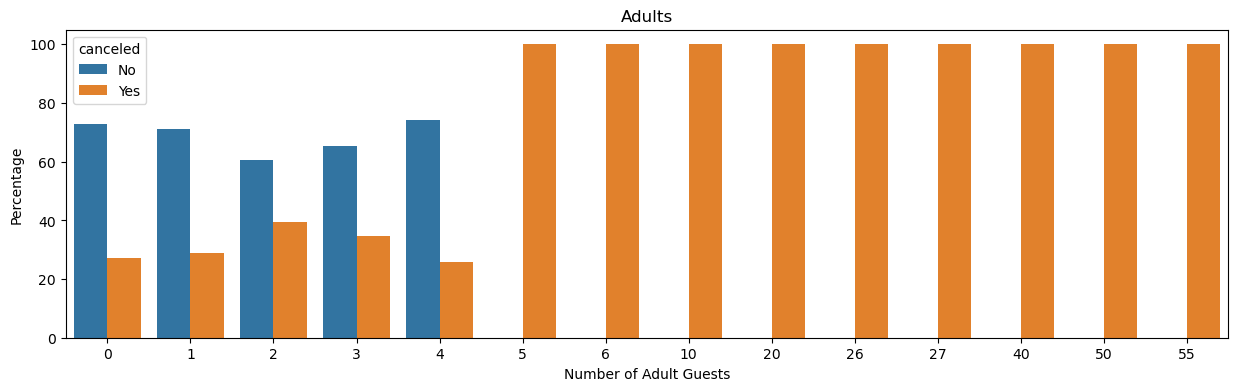

In [94]:
xlabel = "Number of Adult Guests"
ylabel = 'Percentage'
title  = "Adults"
plt.subplots(figsize=(15,4))
plot_countplot(df,'adults',xlabel,ylabel,title,hue='canceled')

That's interesting. Bookings that have more than 5 adults definetly cancel their bookings.

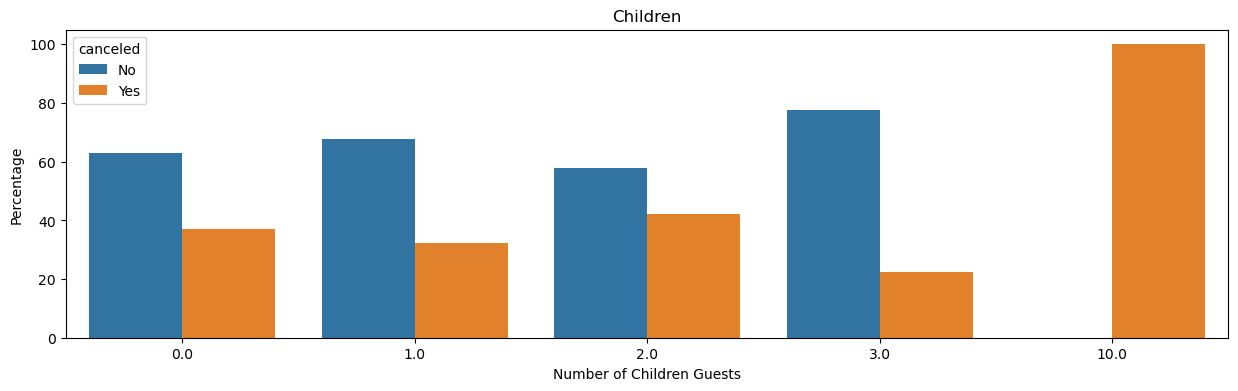

In [95]:
xlabel = "Number of Children Guests"
ylabel = 'Percentage'
title  = "Children"
plt.subplots(figsize=(15,4))
plot_countplot(df,'children',xlabel,ylabel,title,hue='canceled')

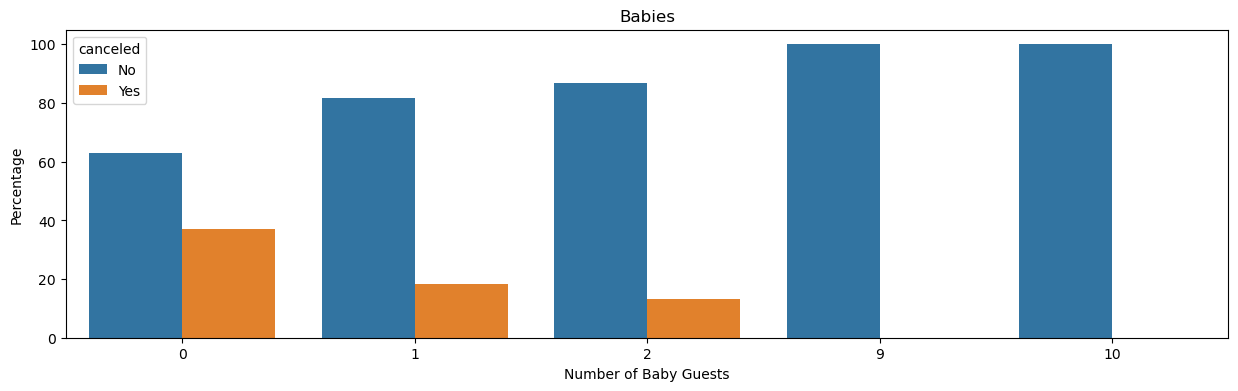

In [96]:
xlabel = "Number of Baby Guests"
ylabel = 'Percentage'
title  = "Babies"
plt.subplots(figsize=(15,4))
plot_countplot(df,'babies',xlabel,ylabel,title,hue='canceled')

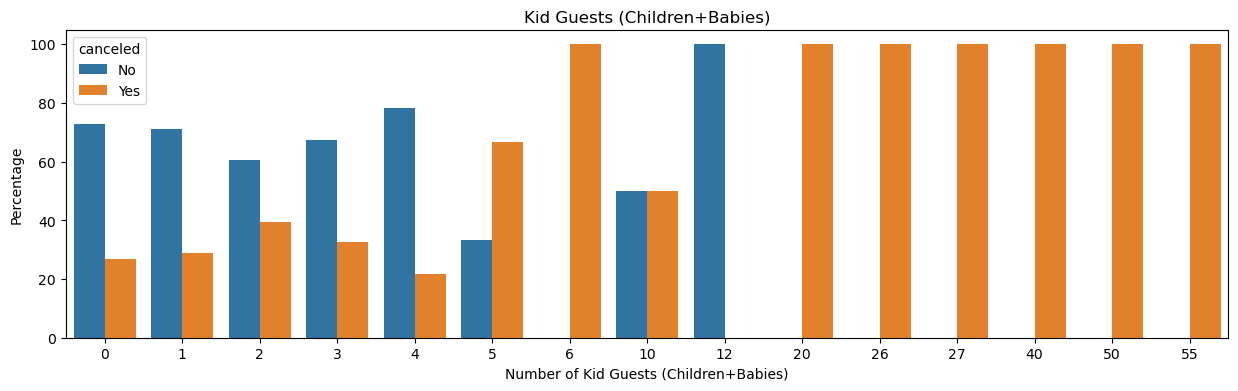

In [97]:
xlabel = "Number of Kid Guests (Children+Babies)"
ylabel = 'Percentage'
title  = "Kid Guests (Children+Babies)"
df['kids'] = df['adults'] + df['babies']
plt.subplots(figsize=(15,4))
plot_countplot(df,'kids',xlabel,ylabel,title,hue='canceled')

We know guests with more than >20 kids are definelty most likely cancel their bookings. Most probably these bookings are group guests.

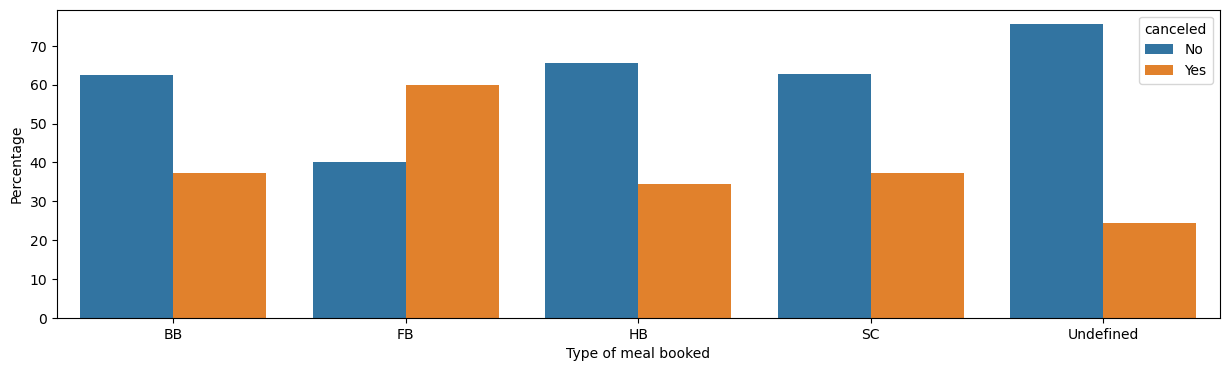

In [100]:
xlabel = "Type of meal booked"
ylabel = 'Percentage'
plt.subplots(figsize=(15,4))
plot_countplot(df,'meal',xlabel,ylabel,title=None,hue='canceled')

Guests who booked full board meal packages are more likely to cancel their bookings.

In [131]:
df.groupby('country')['canceled'].value_counts(normalize=True).reset_index(name='prop').sort_values(by='prop',ascending=False).query("(canceled=='Yes')&(prop<1)").head(10)

,country,canceled,prop
168,MAC,Yes,0.937500
114,HKG,Yes,0.896552
259,TJK,Yes,0.888889
8,ARE,Yes,0.843137
94,FRO,Yes,0.800000
32,BHR,Yes,0.800000
175,MDV,Yes,0.750000
28,BGD,Yes,0.750000
226,QAT,Yes,0.733333
236,SEN,Yes,0.727273


Guests from: Macao, Hong Kong, Tajikistan, United Arab Emirates,Faroe Islands,Bahrain, Maldives, Bangladesh, Qatar and Senegal were the top 10 countries with the highest canceled rates (With atleast one guest who showed up ).

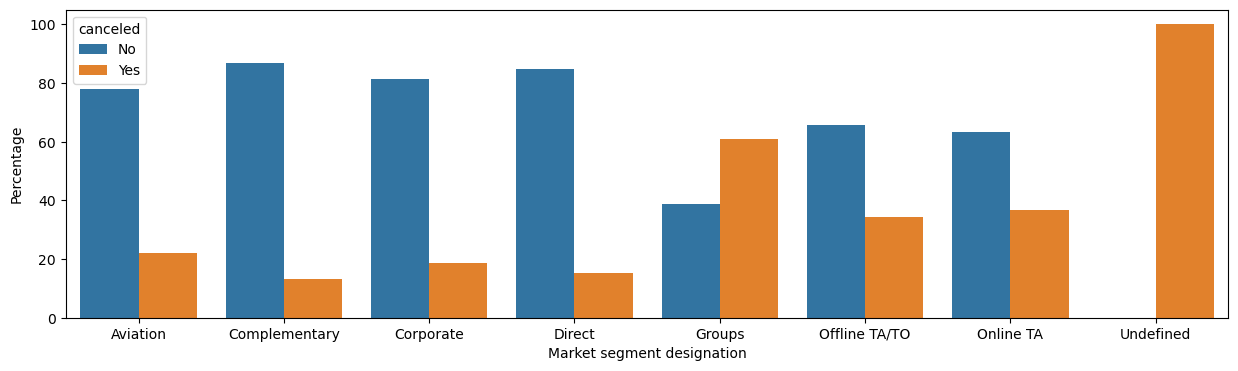

In [133]:
xlabel = "Market segment designation"
ylabel = 'Percentage'
plt.subplots(figsize=(15,4))
plot_countplot(df,'market_segment',xlabel,ylabel,title=None,hue='canceled')

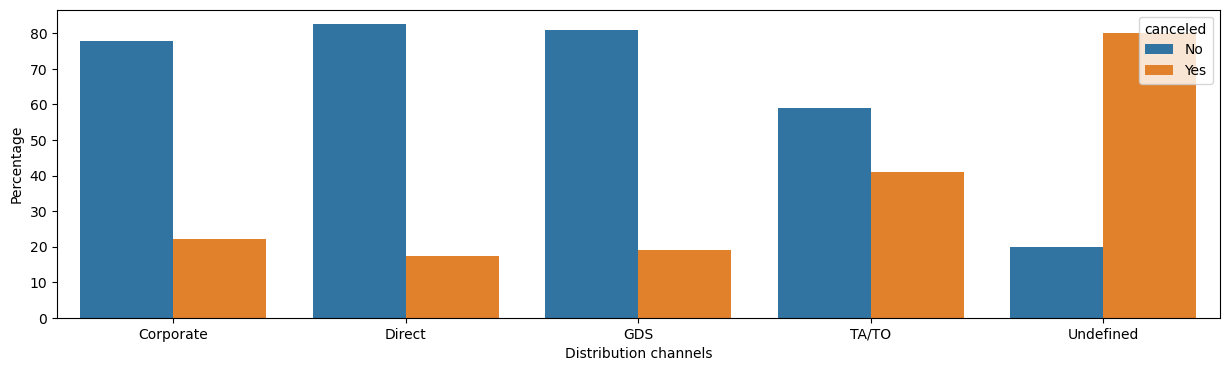

In [134]:
xlabel = "Distribution channels"
ylabel = 'Percentage'
plt.subplots(figsize=(15,4))
plot_countplot(df,'distribution_channel',xlabel,ylabel,title=None,hue='canceled')

Group bookings are more likely to cancel their bookings.

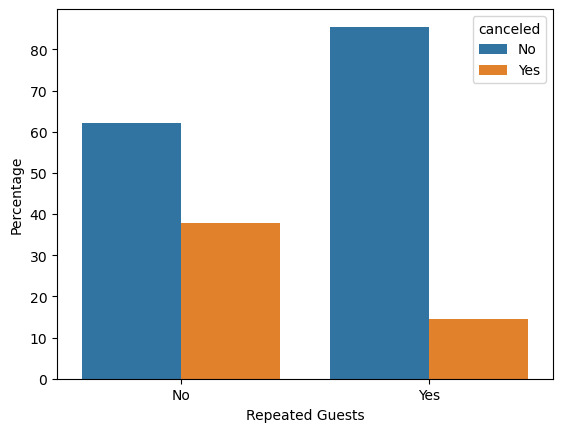

In [142]:

xlabel = "Repeated Guests"
ylabel = 'Percentage'
plot_countplot(df,'is_repeated_guest',xlabel,ylabel,title=None,hue='canceled')
plt.xticks(ticks=[0,1],labels=['No','Yes']);

Repeated Guests are less likely to cancel their bookings

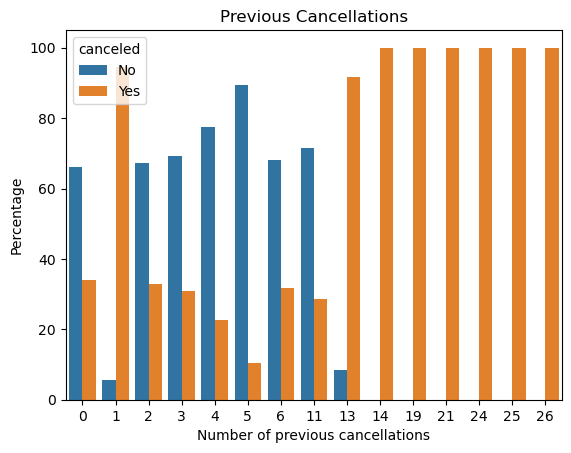

In [147]:
title="Previous Cancellations"
xlabel = "Number of previous cancellations"
ylabel = 'Percentage'
plot_countplot(df,'previous_cancellations',xlabel,ylabel,title=title,hue='canceled')
# plt.xticks(ticks=[0,1],labels=['No','Yes']);

This is super interesting, guests who have canceled before atleast once, are more likely to cancel again. Guests who have previously canceled more than 11 times are also more likely to cancel again

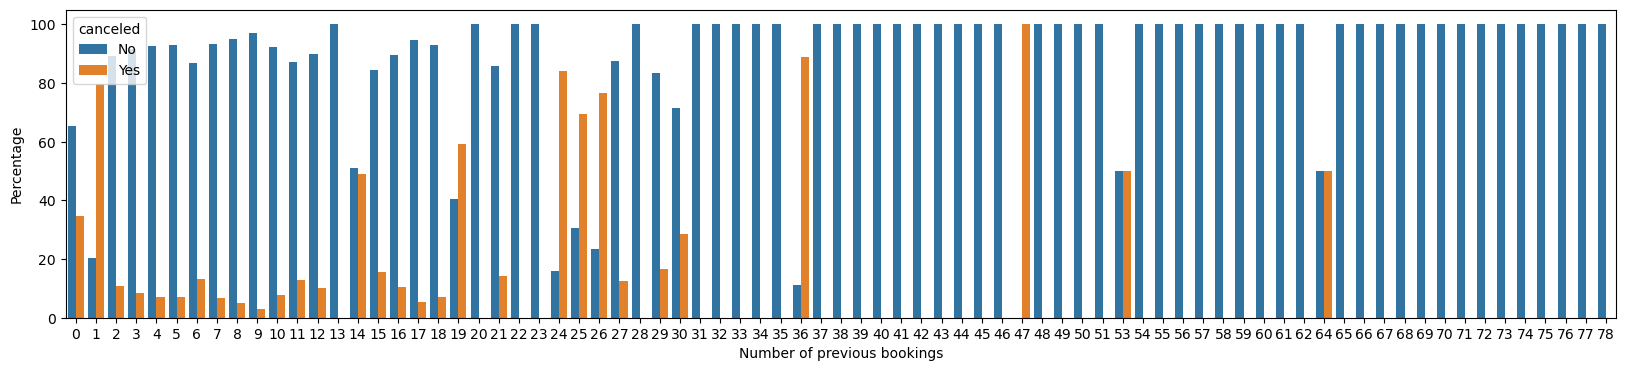

In [165]:
title=None
xlabel = "Number of previous bookings"
ylabel = 'Percentage'
df['total_previous_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']
plt.figure(figsize=(20,4))
plot_countplot(df,'total_previous_bookings',xlabel,ylabel,title=title,hue='canceled')

<AxesSubplot:xlabel='total_previous_bookings', ylabel='Count'>

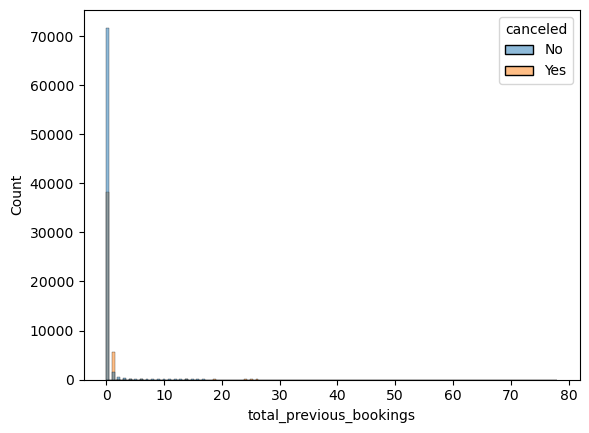

In [163]:
# title="Previous Cancellations"
# xlabel = "Number of previous cancellations"
# ylabel = 'Percentage'
# plot_countplot(df,'previous_bookings_not_canceled',xlabel,ylabel,title=title,hue='canceled')

sns.histplot(data=df,x='total_previous_bookings',bins=160,hue='canceled')

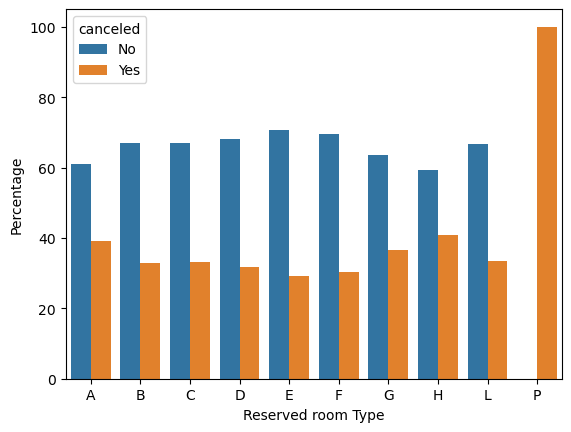

In [169]:

xlabel = "Reserved room Type"
ylabel = 'Percentage'
plot_countplot(df,'reserved_room_type',xlabel,ylabel,title=None,hue='canceled')
# plt.xticks(ticks=[0,1],labels=['No','Yes']);

For this hotel guests who booked room P later canceled their bookings.

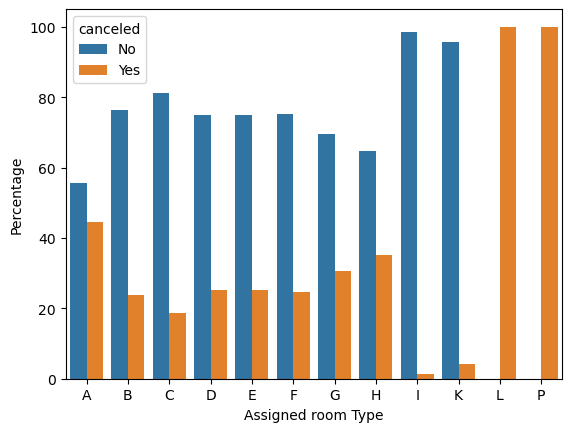

In [171]:
xlabel = "Assigned room Type"
ylabel = 'Percentage'
plot_countplot(df,'assigned_room_type',xlabel,ylabel,title=None,hue='canceled')

Guests who were assigned rooms L and P canceled their bookings.

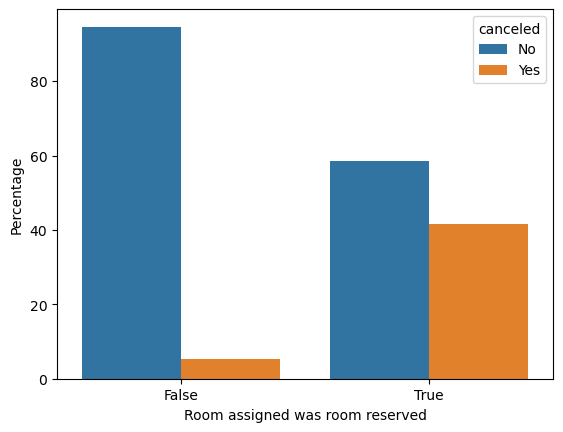

In [174]:
xlabel = "Room assigned was room reserved"
ylabel = 'Percentage'
plot_countplot(df,'is_assigned',xlabel,ylabel,title=None,hue='canceled')

Interestingly, guests who were assigned the room they reserved when booking are more likely to cancel their booking

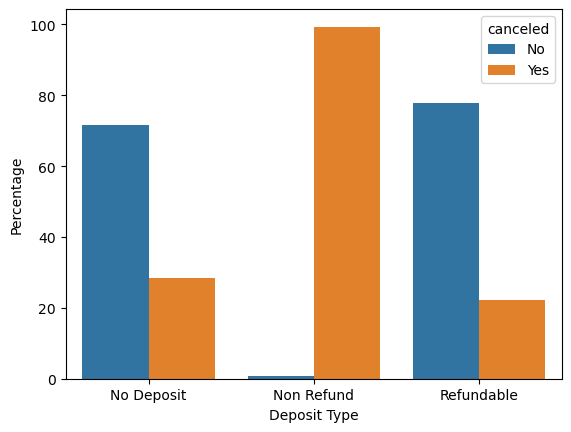

In [190]:
xlabel = "Deposit Type"
ylabel = 'Percentage'
plot_countplot(df,'deposit_type',xlabel,ylabel,title=None,hue='canceled')

Guests who deposited the whole amount were more likely to cancel their bookings

In [192]:
df.groupby('agent')['canceled'].value_counts(normalize=True).reset_index(name='prop').sort_values(by='prop',ascending=False).query("(canceled=='Yes')&(prop<1)").head(10)

,agent,canceled,prop
393,326.0,Yes,0.975758
103,64.0,Yes,0.956522
56,31.0,Yes,0.950617
322,252.0,Yes,0.896552
97,58.0,Yes,0.880597
517,495.0,Yes,0.877193
265,192.0,Yes,0.829268
60,33.0,Yes,0.806452
380,310.0,Yes,0.800000
52,29.0,Yes,0.799414


In [193]:
df.groupby('company')['canceled'].value_counts(normalize=True).reset_index(name='prop').sort_values(by='prop',ascending=False).query("(canceled=='Yes')&(prop<1)").head(10)

,company,canceled,prop
165,197.0,Yes,0.744681
306,350.0,Yes,0.666667
427,466.0,Yes,0.666667
53,67.0,Yes,0.655431
30,43.0,Yes,0.620690
434,478.0,Yes,0.500000
215,250.0,Yes,0.500000
442,486.0,Yes,0.500000
355,392.0,Yes,0.500000
76,85.0,Yes,0.500000


Bookings from AgentID `326` and CompanyID `165` were more likely to cancel their bookings.

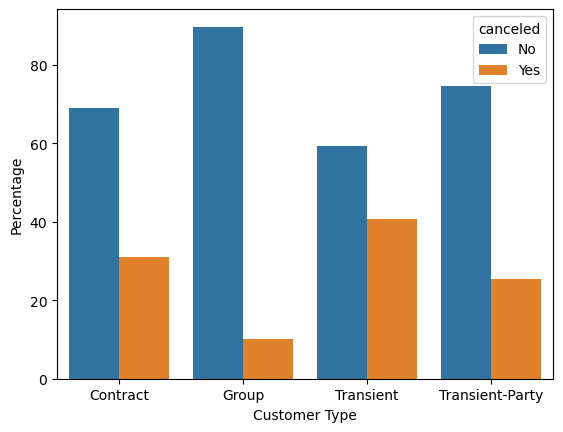

In [203]:
xlabel = "Customer Type"
ylabel = 'Percentage'
plot_countplot(df,'customer_type',xlabel,ylabel,title=None,hue='canceled')

That is really weird. Group customer type have the least cancelation rate.

In [211]:
df.groupby('canceled')['adr'].aggregate([np.mean,np.median])

,mean,median
canceled,,
No,99.987693,92.5
Yes,104.844598,96.2


Canceled bookings and `non_canceled` bookings have an average APR of 100.

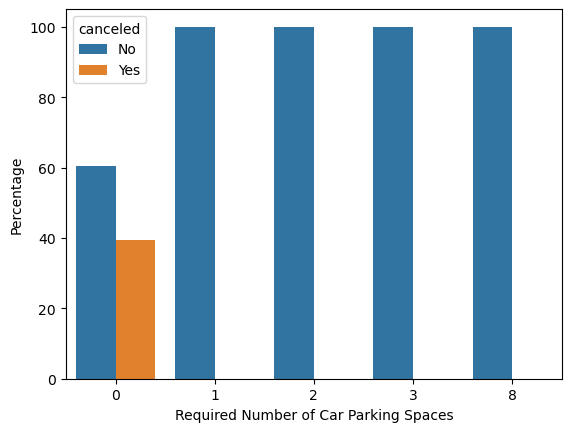

In [214]:
xlabel = "Required Number of Car Parking Spaces"
ylabel = 'Percentage'
plot_countplot(df,'required_car_parking_spaces',xlabel,ylabel,title=None,hue='canceled')

Guests who required no parking spaces are more likely to cancel.

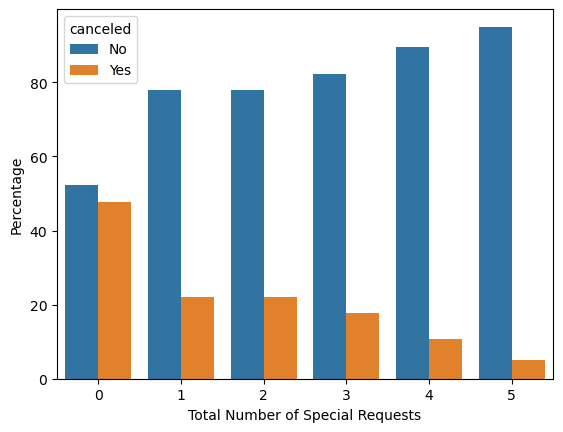

In [218]:
xlabel = "Total Number of Special Requests"
ylabel = 'Percentage'
plot_countplot(df,'total_of_special_requests',xlabel,ylabel,title=None,hue='canceled')

Guests who requested more than 1 specical request are more likely to show up

In [229]:
df[df['reservation_status']=='No-Show'][['reservation_status_date','is_canceled','arrival_date_month','arrival_date_day_of_month']]

,reservation_status_date,is_canceled,arrival_date_month,arrival_date_day_of_month
122,2015-04-07,1,July,4
328,2015-12-07,1,July,12
343,2015-12-07,1,July,12
467,2015-07-17,1,July,17
472,2015-07-17,1,July,17
...,...,...,...,...
104650,2017-01-02,1,February,1
108459,2017-07-16,1,July,16
108829,2017-06-05,1,May,6
111925,2017-07-17,1,July,17
